In [ ]:
import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score,f1_score


In [ ]:
data = pd.read_csv('/content/finaldata.csv')

In [ ]:
data.head()

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


In [ ]:
data.dtypes

UnderwrittenCoverID                  int64
PolicyID                             int64
TransactionMonth            datetime64[ns]
IsVATRegistered                       bool
Citizenship                         object
LegalType                           object
Title                               object
Language                            object
Bank                                object
AccountType                         object
MaritalStatus                       object
Gender                              object
Country                             object
Province                            object
PostalCode                         float64
MainCrestaZone                      object
SubCrestaZone                       object
ItemType                            object
mmcode                             float64
VehicleType                         object
RegistrationYear                   float64
make                                object
Model                               object
Cylinders  

In [ ]:
data['TransactionMonth'] = pd.to_datetime(data['TransactionMonth'])

In [ ]:
data.count()

UnderwrittenCoverID         109864
PolicyID                    109864
TransactionMonth            109864
IsVATRegistered             109864
Citizenship                 109864
LegalType                   109864
Title                       109864
Language                    109864
Bank                        109864
AccountType                 109863
MaritalStatus               109863
Gender                      109863
Country                     109863
Province                    109863
PostalCode                  109863
MainCrestaZone              109863
SubCrestaZone               109863
ItemType                    109863
mmcode                      109863
VehicleType                 109863
RegistrationYear            109863
make                        109863
Model                       109863
Cylinders                   109863
cubiccapacity               109863
kilowatts                   109863
bodytype                    109863
NumberOfDoors               109863
VehicleIntroDate    

In [ ]:
data.isnull().sum()

UnderwrittenCoverID         0
PolicyID                    0
TransactionMonth            0
IsVATRegistered             0
Citizenship                 0
LegalType                   0
Title                       0
Language                    0
Bank                        0
AccountType                 0
MaritalStatus               0
Gender                      0
Country                     0
Province                    0
PostalCode                  0
MainCrestaZone              0
SubCrestaZone               0
ItemType                    0
mmcode                      0
VehicleType                 0
RegistrationYear            0
make                        0
Model                       0
Cylinders                   0
cubiccapacity               0
kilowatts                   0
bodytype                    0
NumberOfDoors               0
VehicleIntroDate            0
CustomValueEstimate         0
AlarmImmobiliser            0
TrackingDevice              0
CapitalOutstanding          0
NewVehicle

In [ ]:
# Removing duplicate rows.
print('Duplicate Rows Count : ', data.duplicated().sum())
data=data.drop_duplicates(keep="first")



Duplicate Rows Count :  4


In [ ]:
data.drop(columns=['NumberOfVehiclesInFleet'],inplace=True)

In [ ]:
data.dropna(inplace=True)

In [ ]:
data.shape

(109863, 51)

In [ ]:
def encoder(method, dataframe, columns_label, columns_onehot):

    if method == 'labelEncoder':

        df_lbl = dataframe.copy()

        for col in columns_label:
            label = LabelEncoder()
            label.fit(list(dataframe[col].values))
            df_lbl[col] = label.transform(df_lbl[col].values)

        return df_lbl

    elif method == 'oneHotEncoder':

        df_oh = dataframe.copy()

        df_oh= pd.get_dummies(data = df_oh, prefix = 'ohe', prefix_sep='_',
                       columns = columns_onehot,
                       drop_first =True,
                       dtype='int8')

        return df_oh



In [ ]:
columns_label = ['Citizenship', 'LegalType', 'Title', 'Language', 'Bank', 'AccountType',
                 'MaritalStatus', 'Gender', 'Country', 'Province', 'MainCrestaZone',
                 'SubCrestaZone', 'ItemType', 'VehicleType', 'make', 'Model', 'bodytype',
                 'AlarmImmobiliser', 'TrackingDevice', 'NewVehicle', 'WrittenOff',
                 'Rebuilt', 'Converted', 'CrossBorder', 'TermFrequency', 'ExcessSelected',
                 'CoverCategory', 'CoverType', 'CoverGroup', 'Section', 'Product',
                 'StatutoryClass', 'StatutoryRiskType','IsVATRegistered']

columns_onehot = columns_label

# Encoding
df_label = encoder('labelEncoder', data.copy(), columns_label, columns_onehot)
df_onehot = encoder('oneHotEncoder', data.copy(), columns_label, columns_onehot)

# Display results
print(df_label.head())
print(df_onehot.head())

   UnderwrittenCoverID  PolicyID TransactionMonth  IsVATRegistered  \
0               145249     12827       2015-03-01                1   
1               145249     12827       2015-05-01                1   
2               145249     12827       2015-07-01                1   
3               145255     12827       2015-05-01                1   
4               145255     12827       2015-07-01                1   

   Citizenship  LegalType  Title  Language  Bank  AccountType  ...  \
0            0          0      2         0     2            0  ...   
1            0          0      2         0     2            0  ...   
2            0          0      2         0     2            0  ...   
3            0          0      2         0     2            0  ...   
4            0          0      2         0     2            0  ...   

   ExcessSelected  CoverCategory  CoverType  CoverGroup  Section  Product  \
0              10             26         21           5        1        1   
1   

In [ ]:
df_label.head()

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01,1,0,0,2,0,2,0,...,8,24,20,5,1,1,0,0,21.929825,0.0
1,145249,12827,2015-05-01,1,0,0,2,0,2,0,...,8,24,20,5,1,1,0,0,21.929825,0.0
2,145249,12827,2015-07-01,1,0,0,2,0,2,0,...,8,24,20,5,1,1,0,0,0.000000,0.0
3,145255,12827,2015-05-01,1,0,0,2,0,2,0,...,0,15,12,5,1,1,0,0,512.848070,0.0
4,145255,12827,2015-07-01,1,0,0,2,0,2,0,...,0,15,12,5,1,1,0,0,0.000000,0.0


In [ ]:
df_onehot.head()

,UnderwrittenCoverID,PolicyID,TransactionMonth,PostalCode,mmcode,RegistrationYear,Cylinders,cubiccapacity,kilowatts,NumberOfDoors,...,ohe_10,ohe_11,ohe_12,ohe_1,ohe_2,ohe_3,ohe_4,ohe_1,ohe_2,ohe_True
0,145249,12827,2015-03-01,1459.0,44069150.0,2004.0,6.0,2597.0,130.0,4.0,...,0,0,0,1,0,0,0,1,0,1
1,145249,12827,2015-05-01,1459.0,44069150.0,2004.0,6.0,2597.0,130.0,4.0,...,0,0,0,1,0,0,0,1,0,1
2,145249,12827,2015-07-01,1459.0,44069150.0,2004.0,6.0,2597.0,130.0,4.0,...,0,0,0,1,0,0,0,1,0,1
3,145255,12827,2015-05-01,1459.0,44069150.0,2004.0,6.0,2597.0,130.0,4.0,...,0,0,0,1,0,0,0,1,0,1
4,145255,12827,2015-07-01,1459.0,44069150.0,2004.0,6.0,2597.0,130.0,4.0,...,0,0,0,1,0,0,0,1,0,1


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Define the scaler function
def scaler(method, data, columns_scaler):
    if method == 'standardScaler':
        standard = StandardScaler()
        df_standard = data.copy()
        df_standard[columns_scaler] = standard.fit_transform(df_standard[columns_scaler])
        return df_standard

    elif method == 'minMaxScaler':
        min_max = MinMaxScaler()
        df_minmax = data.copy()
        df_minmax[columns_scaler] = min_max.fit_transform(df_minmax[columns_scaler])
        return df_minmax

    elif method == 'npLog':
        df_nplog = data.copy()
        df_nplog[columns_scaler] = np.log(df_nplog[columns_scaler])
        return df_nplog

    elif method == 'default':
        return data

# Assuming 'df_label' is your encoded dataset
data = df_label.copy()

# Extract datetime features from 'TransactionMonth'
data['TransactionYear'] = data['TransactionMonth'].dt.year
data['TransactionMonthNum'] = data['TransactionMonth'].dt.month
data['TransactionDay'] = data['TransactionMonth'].dt.day
data['TransactionDayOfWeek'] = data['TransactionMonth'].dt.dayofweek

# Drop the original TransactionMonth column
data = data.drop(columns=['TransactionMonth'])

# Drop the 'VehicleIntroDate' column or transform it properly if it's required for your model
# For now, we'll drop it to avoid complications.
data = data.drop(columns=['VehicleIntroDate'])

# Define the columns to scale
columns_scaler = ['PostalCode', 'mmcode', 'RegistrationYear', 'Cylinders',
                  'cubiccapacity', 'kilowatts', 'NumberOfDoors', 'CustomValueEstimate',
                  'CapitalOutstanding', 'SumInsured', 'CalculatedPremiumPerTerm',
                  'TotalPremium', 'TotalClaims', 'TransactionYear', 'TransactionMonthNum',
                  'TransactionDay', 'TransactionDayOfWeek']

# Filter out columns that are not numeric
non_numeric_cols = data.select_dtypes(exclude=[np.number]).columns
data = data.drop(columns=non_numeric_cols)

# Ensure remaining columns are numeric
data = data.apply(pd.to_numeric, errors='coerce')

# Choose the scaling method
method = 'minMaxScaler'

# Apply the scaler
df_scaler = scaler(method, data, columns_scaler)




In [ ]:
df_scaler.head()

,UnderwrittenCoverID,PolicyID,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,MaritalStatus,...,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims,TransactionYear,TransactionMonthNum,TransactionDay,TransactionDayOfWeek
0,145249,12827,1,0,0,2,0,2,0,1,...,1,1,0,0,0.062345,0.002084,1.0,0.181818,0.0,1.000000
1,145249,12827,1,0,0,2,0,2,0,1,...,1,1,0,0,0.062345,0.002084,1.0,0.363636,0.0,0.666667
2,145249,12827,1,0,0,2,0,2,0,1,...,1,1,0,0,0.048986,0.002084,1.0,0.545455,0.0,0.333333
3,145255,12827,1,0,0,2,0,2,0,1,...,1,1,0,0,0.361414,0.002084,1.0,0.363636,0.0,0.666667
4,145255,12827,1,0,0,2,0,2,0,1,...,1,1,0,0,0.048986,0.002084,1.0,0.545455,0.0,0.333333


In [ ]:
# Prepare the data for training
X = df_scaler.drop(columns=['TotalClaims'])  # Assuming 'TotalClaims' is the target variable
y = df_scaler['TotalClaims']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)





In [ ]:
%%time
# Initialize the linear regression model
lr_model = LinearRegression()

# Train the model
lr_model.fit(X_train, y_train)

CPU times: user 1.67 s, sys: 321 ms, total: 1.99 s
Wall time: 1.43 s


LinearRegression()

In [ ]:
%%time
# Initialize the Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

CPU times: user 2.95 s, sys: 29.5 ms, total: 2.98 s
Wall time: 3.01 s


DecisionTreeRegressor(random_state=42)

In [ ]:
%%time
# Random Forest
rfr_model = RandomForestRegressor(random_state=42)
rfr_model.fit(X_train, y_train)


CPU times: user 4min 4s, sys: 422 ms, total: 4min 5s
Wall time: 5min 3s


RandomForestRegressor(random_state=42)

In [ ]:
%%time
# XGBoost
xgb_model = xgb.XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

CPU times: user 7.48 s, sys: 76 ms, total: 7.56 s
Wall time: 4.52 s


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
# Function to evaluate models
def evaluate_model(model, X_test, y_test):
    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Print the evaluation metrics
    print("Evaluation metrics for :{}".format(model.__class__.__name__))
    print(f"\t Mean Absolute Error: {mae}")
    print(f"\t Mean Squared Error: {mse}")
    print(f"\t R-squared Score: {r2}")
    return mae,mse,r2,y_pred



Evaluation metrics for :LinearRegression
	 Mean Absolute Error: 0.0005707176170556288
	 Mean Squared Error: 5.9234612523751916e-05
	 R-squared Score: 0.009106821114141739
Evaluation metrics for :DecisionTreeRegressor
	 Mean Absolute Error: 0.0005256829712087827
	 Mean Squared Error: 0.0001313357512004559
	 R-squared Score: -1.19702120877719
Evaluation metrics for :RandomForestRegressor
	 Mean Absolute Error: 0.0005316191987218755
	 Mean Squared Error: 7.505788531715496e-05
	 R-squared Score: -0.255589315327136
Evaluation metrics for :XGBRegressor
	 Mean Absolute Error: 0.0006181036909100382
	 Mean Squared Error: 7.826280580178691e-05
	 R-squared Score: -0.309202122295696


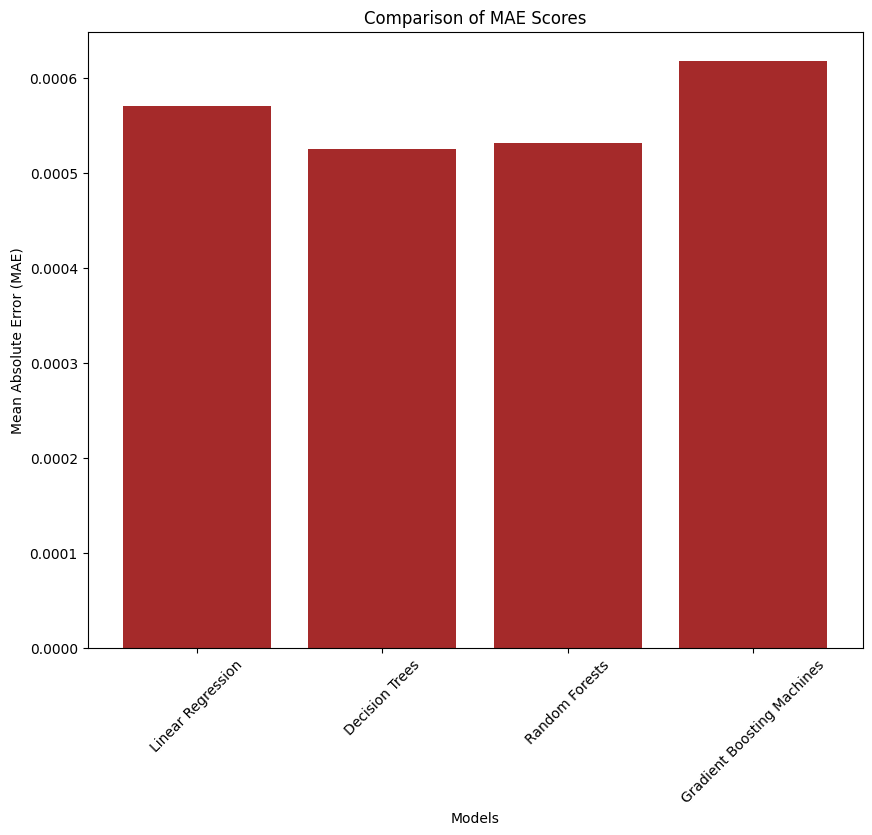

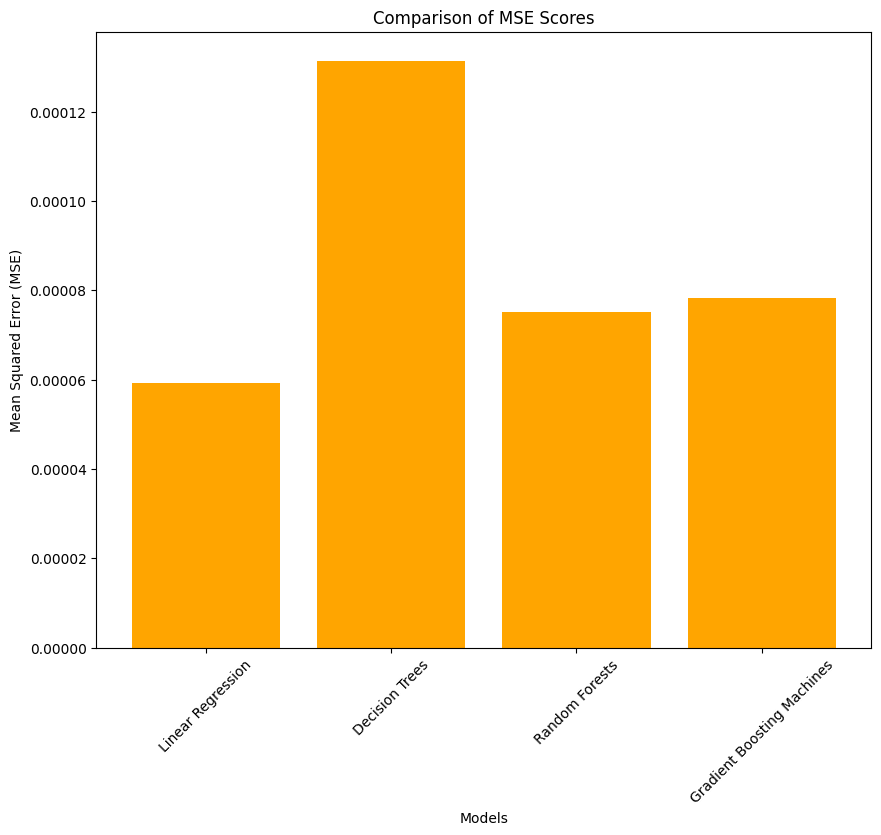

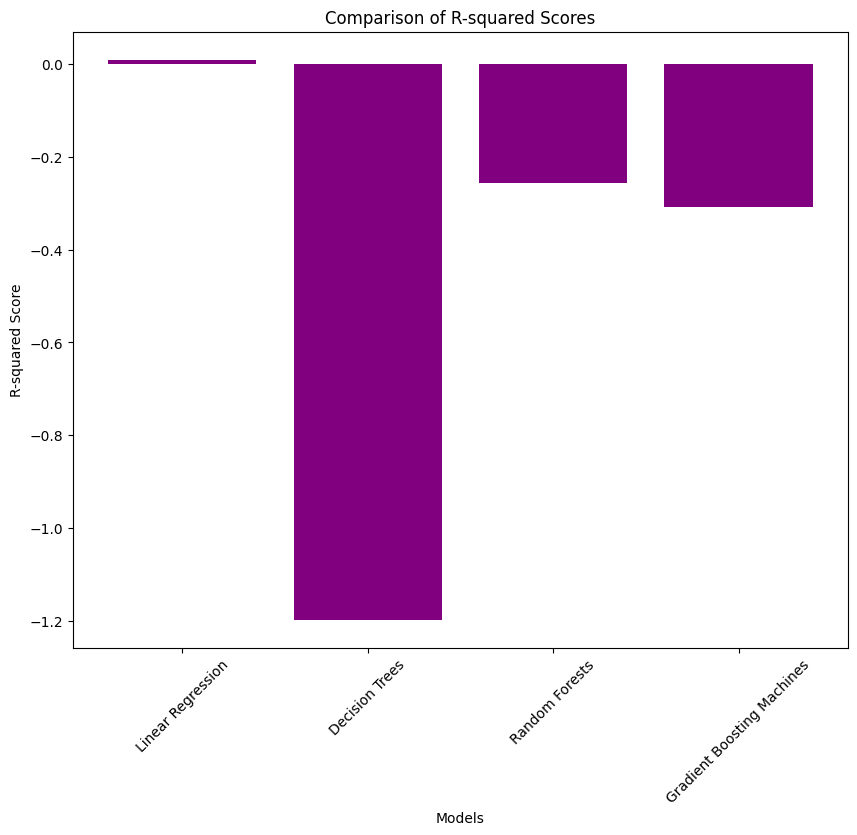

In [ ]:
# Initialize lists to store evaluation metrics for each model
models = ['Linear Regression', 'Decision Trees', 'Random Forests', 'Gradient Boosting Machines']
mae_scores = []
mse_scores = []
r2_scores = []
y_predic = []

# Evaluate each model
for model in [lr_model, dt_model, rfr_model, xgb_model]:
    mae, mse, r2,yp = evaluate_model(model, X_test, y_test)
    mae_scores.append(mae)
    mse_scores.append(mse)
    r2_scores.append(r2)
    y_predic.append(yp)

# Plot MAE scores
plt.figure(figsize=(10, 8))
plt.bar(models, mae_scores, color='brown')
plt.xlabel('Models')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Comparison of MAE Scores')
plt.xticks(rotation=45)
plt.show()

# Plot MSE scores
plt.figure(figsize=(10, 8))
plt.bar(models, mse_scores, color='orange')
plt.xlabel('Models')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Comparison of MSE Scores')
plt.xticks(rotation=45)
plt.show()

# Plot R-squared scores
plt.figure(figsize=(10, 8))
plt.bar(models, r2_scores, color='purple')
plt.xlabel('Models')
plt.ylabel('R-squared Score')
plt.title('Comparison of R-squared Scores')
plt.xticks(rotation=45)
plt.show()

In [ ]:
for y_p in y_predic:
    plt.scatter(x = y_test, y = yp, color = 'violet', marker = 'o', s = 70, alpha = 0.25,
            label = 'Test data')
    plt.title('Test and Pred')
    plt.xlabel('Test')
    plt.ylabel('Pred')
    plt.show()

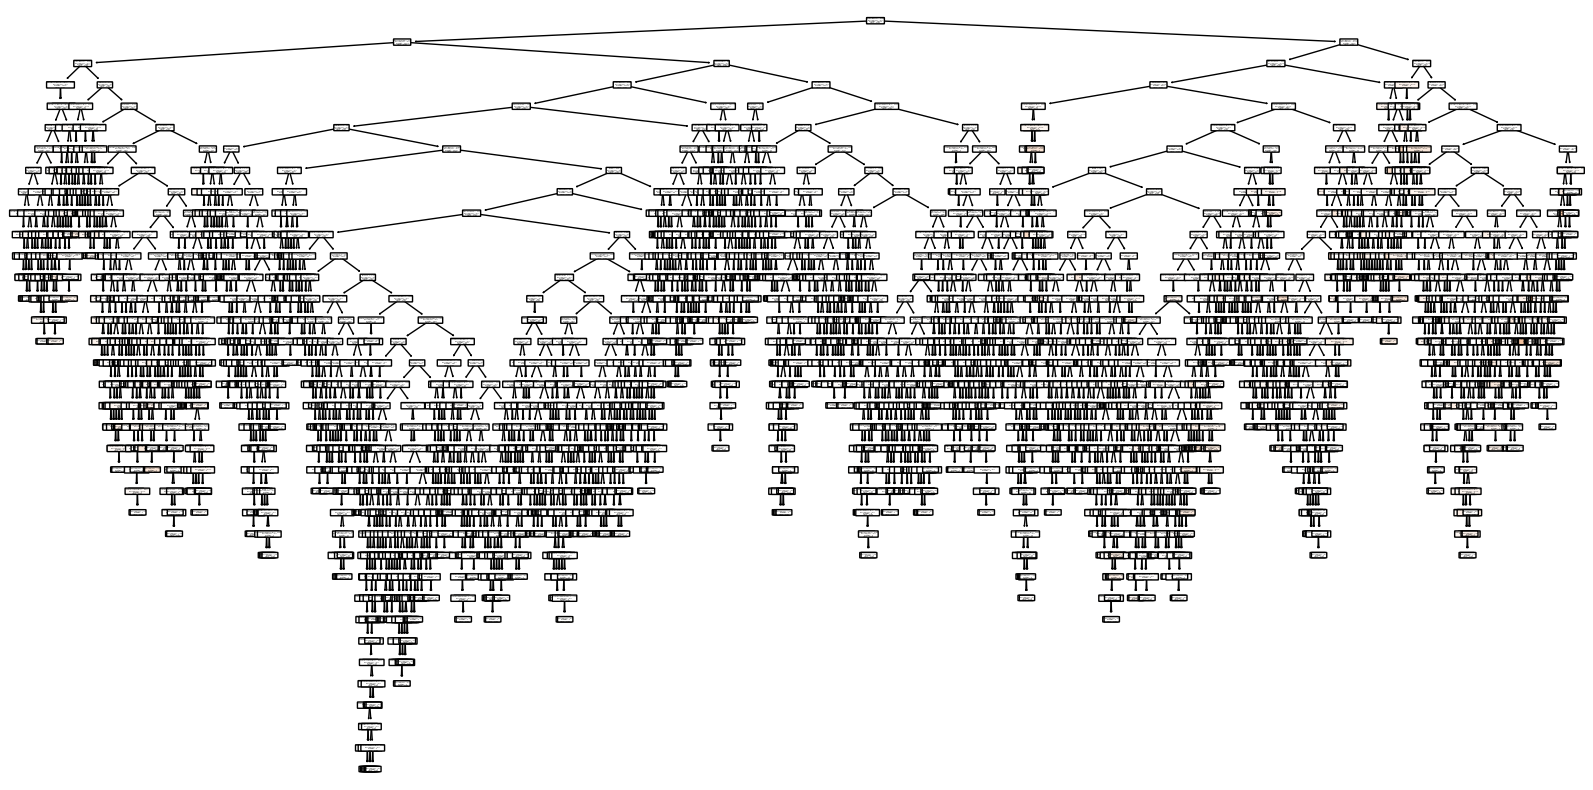

In [ ]:
from sklearn.tree import plot_tree

# Extract a single decision tree from the Random Forest
tree_index = 0  # Choose the index of the tree you want to visualize
#single_tree = dt_model.estimators_[tree_index]

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(decision_tree= dt_model, feature_names=X_train.columns, filled=True, rounded=True)
plt.show()

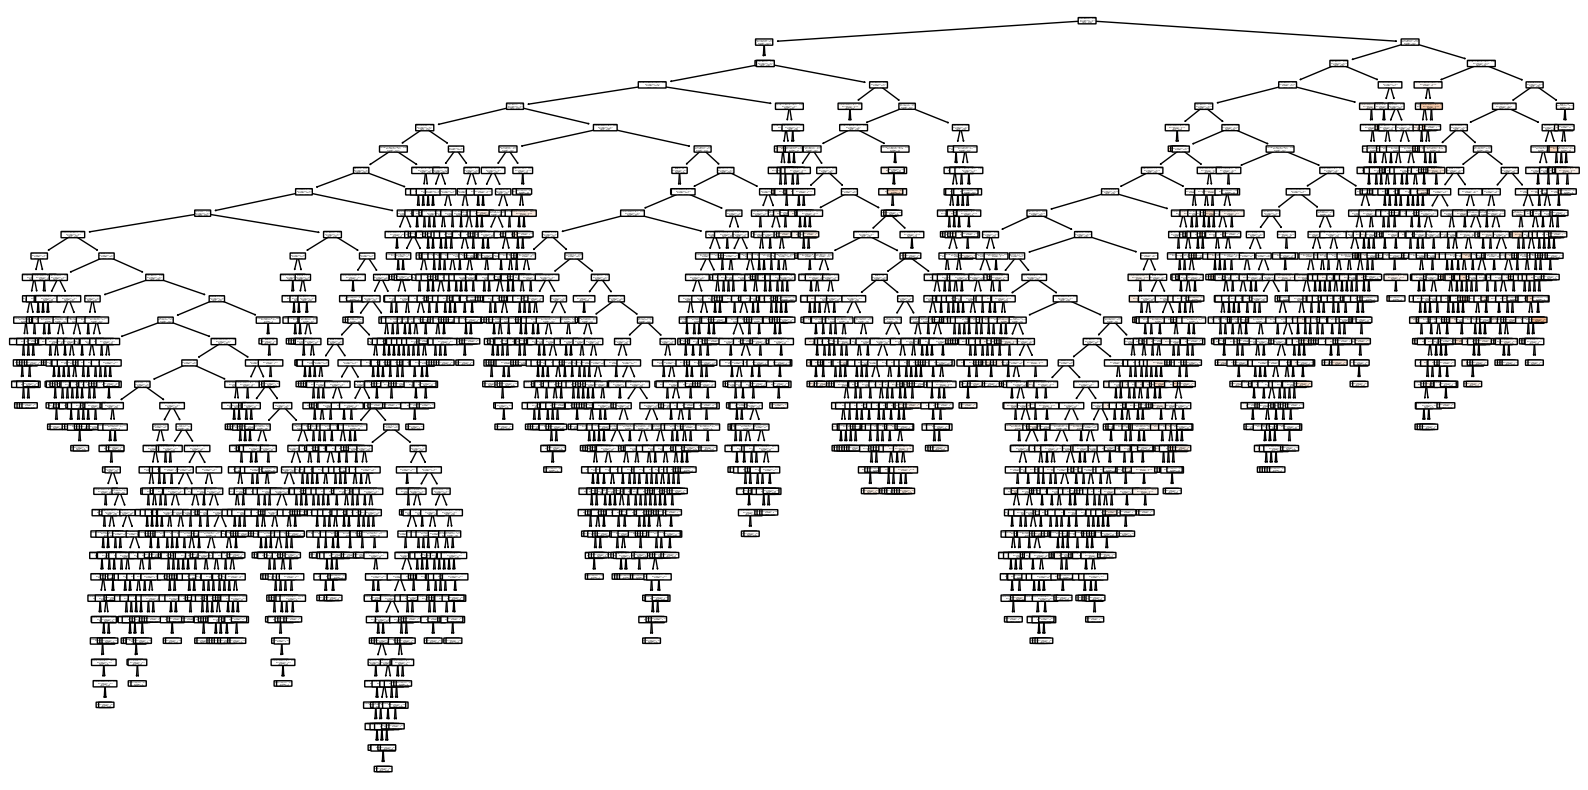

In [ ]:

# Extract a single decision tree from the Random Forest
tree_index = 3  # Choose the index of the tree you want to visualize
single_tree = rfr_model.estimators_[tree_index]

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(single_tree, feature_names=X_train.columns, filled=True, rounded=True)
plt.show()

In [ ]:
# Function to plot feature importance
def plot_feature_importance(model, feature_names, task):
    #feature_importance = model.feature_importances_
    feature_importance = pd.DataFrame(model.feature_importances_, index = feature_names).sort_values(0, ascending=False)

    plt.figure(figsize=(6, 4))

    feature_importance.plot(kind='barh')

    #plt.bar(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
    #plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
    plt.xlabel('Feature Importance')
    plt.title(f'Feature Importance Analysis for {task}')
    plt.show()

<Figure size 600x400 with 0 Axes>

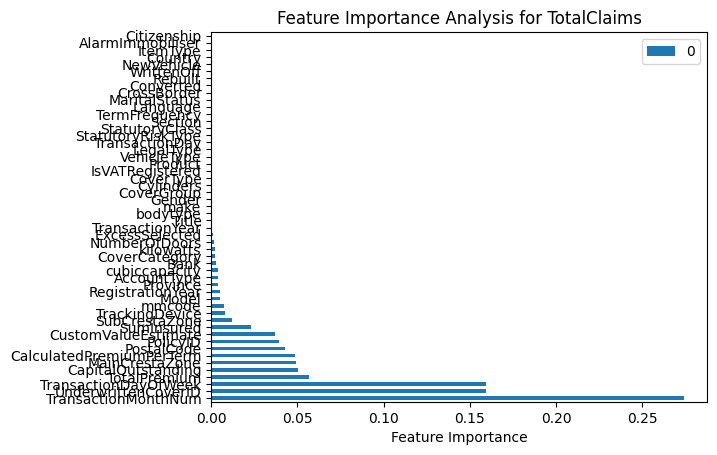

In [ ]:
# Plot feature importance for Decision Tree model
plot_feature_importance(dt_model, X_train.columns, "TotalClaims")

<Figure size 600x400 with 0 Axes>

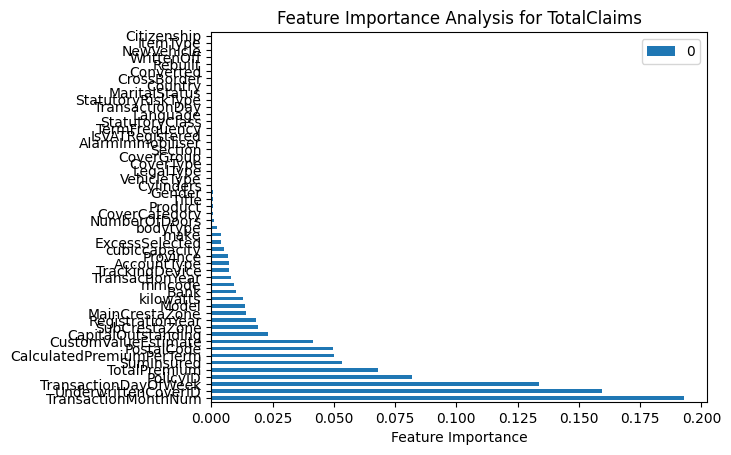

In [ ]:
# Plot feature importance for Random Forest models
plot_feature_importance(rfr_model, X_train.columns, "TotalClaims")

<Figure size 600x400 with 0 Axes>

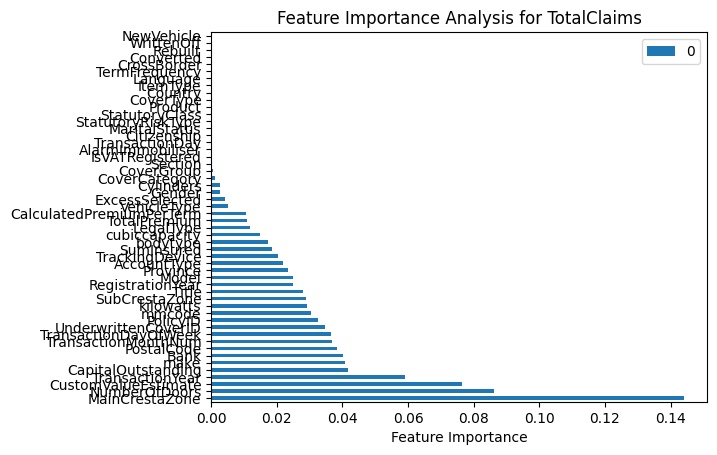

In [ ]:
# Plot feature importance for Gradient Boosting Machines (GBMs) models
plot_feature_importance(xgb_model, X_train.columns, "TotalClaims")

In [ ]:
param_dist = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()

# Initialize randomized search
random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_dist,
    n_iter=10,  # Number of random combinations to try
    cv=4,       # Cross-validation folds
    n_jobs=-1,  # Use all available cores
    verbose=2,
    scoring='r2'  # Use R-squared for evaluation
)

# Fit the randomized search to your data
random_search.fit(X_train, y_train)

In [ ]:
best_params = random_search.best_params_
print("Best hyperparameters:", best_params)

# Evaluate the model with the best hyperparameters
best_rf_model = random_search.best_estimator_
r2_score = best_rf_model.score(X_test, y_test)
print("R-squared score on test data:", r2_score)

In [ ]:
y_pred = rfr_model_hpt.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)



In [ ]:
print(mae)
print(mse)
print(r2)

In [ ]:
from sklearn.tree import plot_tree

# Extract a single decision tree from the Random Forest
tree_index = 0  # Choose the index of the tree you want to visualize
single_tree = rfr_model_hpt.estimators_[tree_index]

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(single_tree, feature_names=X_train.columns, filled=True, rounded=True)
plt.show()